# Machine Learning

### <font color='orange'>Universidad Autónoma de Yucatán</font> _Facultad de Matemáticas_

**Teacher:** Dr. Victor Uc Cetina <[victoruccetina@gmail.com](mailto:victoruccetina@gmail.com)>

**Student:** Ing. Dayan Bravo Fraga <[dayan3847@gmail.com](mailto:dayan3847@gmail.com)>

[GitHub Project](https://github.com/dayan3847/machine_learning/#practice-basis-functions)


# Basis Gaussian 3D

[GitHub](https://github.com/dayan3847/machine_learning/blob/master/dayan3847/basis_functions/basis_gaussian_3d.ipynb)

[Colab](https://colab.research.google.com/github/dayan3847/machine_learning/blob/master/dayan3847/basis_functions/basis_gaussian_3d.ipynb)


### Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

### Random Seed

In [42]:
np.random.seed(0)

## Tools

In [43]:
class ShapeChecker:

    @staticmethod
    def check_shape(_array: np.array, _expected_shape: tuple):
        if _array.shape != _expected_shape:
            raise Exception('Expected shape: {}, actual shape: {}'.format(_expected_shape, _array.shape))

    @staticmethod
    def check_shape_data(_data: np.array):
        if len(_data.shape) != 2 or _data.shape[0] != 3:
            raise Exception('Expected shape: (3, N), actual shape: {}'.format(_data.shape))

    # point or point list
    @staticmethod
    def check_shape_point(_point: np.array, dim: int = 2):
        if len(_point.shape) != 2 or _point.shape[0] != dim:
            raise Exception('Expected shape: ({},point_count), actual shape: {}'.format(dim, _point.shape))


class PlotterData:
    @staticmethod
    def get_x_plot_2d() -> np.array:
        _lim = 3
        _num = 50
        _ls = np.linspace(-_lim, _lim, _num)
        _x_0, _x_1 = np.meshgrid(_ls, _ls)
        _r = np.array([_x_0.flatten(), _x_1.flatten()])
        return _r


## Gaussian Classes

In [54]:
class BasisFunction3d:

    def basis_function(self, x_: np.array) -> np.array:
        ShapeChecker.check_shape_point(x_)

    @staticmethod
    def activation_function(y: np.array) -> np.array:
        return 1 / (1 + np.exp(-1 * y))


class BasisGaussian3d(BasisFunction3d):

    # mu_: np.array: column vector (2, 1)
    def __init__(self, mu: np.array = np.zeros(2)[:, np.newaxis], cov: np.array = np.identity(2)):
        ShapeChecker.check_shape(mu, (2, 1))
        ShapeChecker.check_shape(cov, (2, 2,))
        self.mu: np.array = mu
        self.cov: np.array = cov

    def plot(self, fig_: plt.figure, pos: int, pos_act: int, w_: float = 1.) -> plt.axes:
        _s = 3
        _x_plot: np.array = PlotterData.get_x_plot_2d()
        _y_plot: np.array = self.basis_function(_x_plot)
        _y_plot_h: np.array = w_ * _y_plot
        _y_plot_g: np.array = self.activation_function(_y_plot_h)

        _ax: list[plt.axes] = [
            fig_.add_subplot(pos, projection='3d'),
            fig_.add_subplot(pos_act, projection='3d'),
        ]
        for _ax_i in _ax:
            _ax_i.set_xlim(-_s, _s)
            _ax_i.set_ylim(-_s, _s)
            _ax_i.set_zlim(0, 1)
            _ax_i.set_xlabel('x_0')
            _ax_i.set_ylabel('x_1')
            _ax_i.set_zlabel('y')

        _ax[0].set_title('{} w={}'.format(self.__class__.__name__, w_))
        _ax[0].plot_trisurf(_x_plot[0], _x_plot[1], _y_plot_h, cmap='viridis', edgecolor='none')

        _ax[1].set_title('{} w={} activation'.format(self.__class__.__name__, w_))
        _ax[1].plot_trisurf(_x_plot[0], _x_plot[1], _y_plot_g, cmap='viridis', edgecolor='none')


class BasisGaussian3dMultivariateNormal(BasisGaussian3d):
    def __init__(self, mu_: np.array = np.zeros(2)[:, np.newaxis], cov: np.array = np.identity(2)):
        super().__init__(mu_, cov)
        _mu_f = mu_.flatten()
        ShapeChecker.check_shape(_mu_f, (2,))
        self.multivariate_normal = multivariate_normal(mean=_mu_f, cov=self.cov)

    def basis_function(self, x_: np.array) -> np.array:
        super().basis_function(x_)
        _x_point = np.dstack(x_)
        return self.multivariate_normal.pdf(_x_point)


class BasisGaussian3dVictorUc(BasisGaussian3d):
    def basis_function_x_i(self, x_i_: np.array) -> np.array:
        ShapeChecker.check_shape(x_i_, (2, 1))
        # x - mu_
        _x_mu = x_i_ - self.mu
        # (x - mu_)T
        _x_mu_t = _x_mu.T
        # inv(cov)
        _cov_inv = np.linalg.inv(self.cov)
        _r_i: np.array = np.exp(-.5 * _x_mu_t @ _cov_inv @ _x_mu)
        return _r_i

    def basis_function(self, x_: np.array) -> np.array:
        super().basis_function(x_)
        _r: np.array = np.array([])
        for _x_i in x_.T:
            _x_i_c = _x_i[:, np.newaxis]
            _r_i = self.basis_function_x_i(_x_i_c)
            _r = np.append(_r, _r_i)
        return _r


class BasisGaussian3dDayanBravo(BasisGaussian3d):
    def basis_function(self, x_: np.array) -> np.array:
        super().basis_function(x_)
        _r: np.array = (
                (np.exp(-1 * (x_[0] ** 2) / 2))
                * (np.exp(-1 * (x_[1] ** 2) / 2))
        )

        return _r


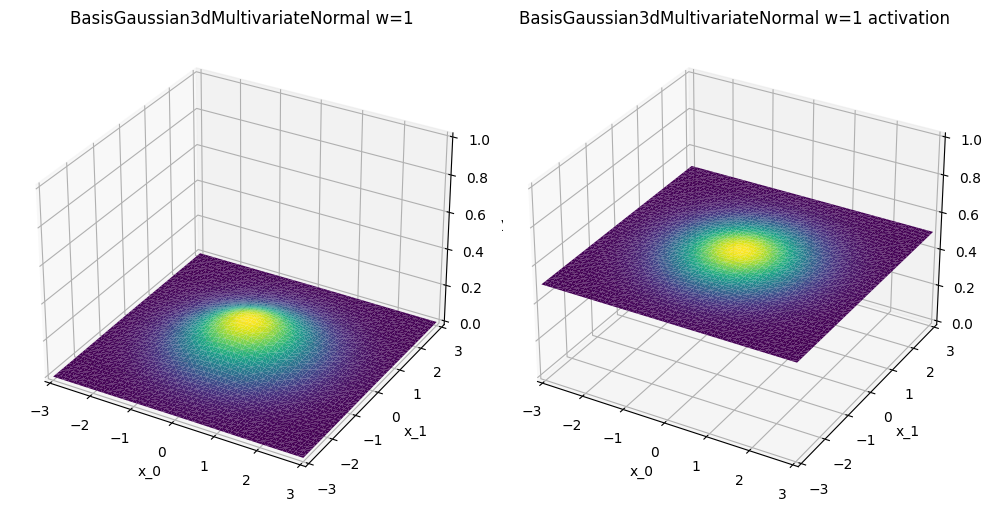

In [59]:
fig = plt.figure(figsize=(10, 5))

g1 = BasisGaussian3dMultivariateNormal()
g1.plot(fig, 121, 122, 1)

plt.tight_layout()
plt.show()

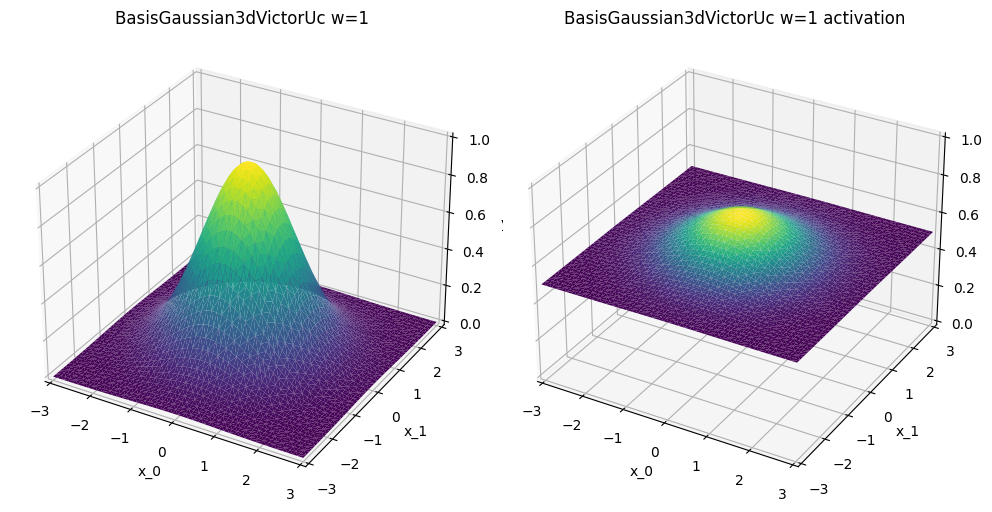

In [57]:
fig = plt.figure(figsize=(10, 5))

g1 = BasisGaussian3dVictorUc()
g1.plot(fig, 121, 122, 1)

plt.tight_layout()
plt.show()

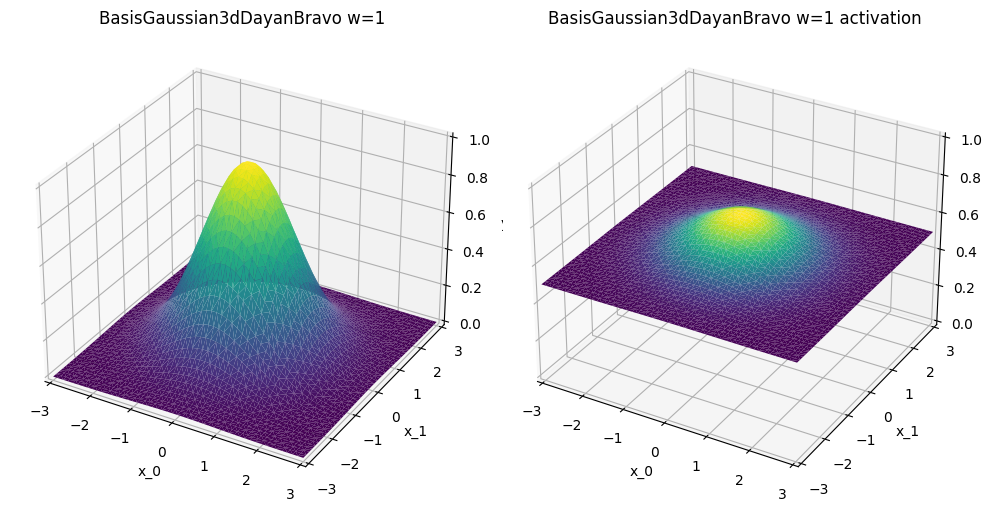

In [58]:
fig = plt.figure(figsize=(10, 5))

g1 = BasisGaussian3dDayanBravo()
g1.plot(fig, 121, 122, 1)

plt.tight_layout()
plt.show()